In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
import warnings
warnings.filterwarnings(action="ignore")

from scipy.stats import skew, norm
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax

from sklearn.ensemble import RandomForestRegressor

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))



/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/test.csv
/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv


In [2]:
train = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/train.csv')
test= pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/test.csv')
train.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


In [3]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


## Null Values

In [4]:
#dealing with null values in the train and test dataset
null = train.isna().sum().sort_values(ascending = True)
null_2 = test.isna().sum().sort_values(ascending = True)
null_values = pd.concat([null, null_2], keys = ['train null', 'test null'], axis = 1)
null_values.head(40)

,train null,test null
1stFlrSF,0,0.0
2ndFlrSF,0,0.0
3SsnPorch,0,0.0
Alley,1369,1352.0
BedroomAbvGr,0,0.0
BldgType,0,0.0
BsmtCond,37,45.0
BsmtExposure,38,44.0
BsmtFinSF1,0,1.0
BsmtFinSF2,0,1.0


In [5]:
#Lot Frontage
data = [train, test]
for dataset in data:
    x = dataset.iloc[:, 3].values
    x = x.reshape(-1,1)
    imputer  = SimpleImputer(strategy = 'mean', missing_values = np.nan)
    imputer = imputer.fit(x)
    x = imputer.transform(x)
    dataset.iloc[:, 3] = x

In [6]:
#Alley
data = [train, test]
for dataset in data:
    x = dataset.iloc[:,6].values
    x = x.reshape(-1,1)
    impute = SimpleImputer(strategy = 'most_frequent', missing_values = np.nan)
    impute = impute.fit(x)
    x = impute.transform(x)
    dataset.iloc[:, 6] = x    

In [7]:
# BsmtCond
data = [train, test]
for dataset in data:
    x = dataset.iloc[:,31].values
    x = x.reshape(-1,1)
    impute = SimpleImputer(strategy = 'most_frequent', missing_values = np.nan)
    impute = impute.fit(x)
    x = impute.transform(x)
    dataset.iloc[:, 31] = x 

In [8]:
#BsmtExposure
data = [train, test]
for dataset in data:
    x = dataset.iloc[:,32].values
    x = x.reshape(-1,1)
    impute = SimpleImputer(strategy = 'most_frequent', missing_values = np.nan)
    impute = impute.fit(x)
    x = impute.transform(x)
    dataset.iloc[:, 32] = x 

In [9]:
#BsmtFinType1
data = [train, test]
for dataset in data:
    x = dataset.iloc[:,33].values
    x = x.reshape(-1,1)
    impute = SimpleImputer(strategy = 'most_frequent', missing_values = np.nan)
    impute = impute.fit(x)
    x = impute.transform(x)
    dataset.iloc[:, 33] = x 

In [10]:
#BsmtFinType2
data = [train, test]
for dataset in data:
    x = dataset.iloc[:,35].values
    x = x.reshape(-1,1)
    impute = SimpleImputer(strategy = 'most_frequent', missing_values = np.nan)
    impute = impute.fit(x)
    x = impute.transform(x)
    dataset.iloc[:, 35] = x 

In [11]:
#BsmtQual
data = [train, test]
for dataset in data:
    x = dataset.iloc[:,30].values
    x = x.reshape(-1,1)
    impute = SimpleImputer(strategy = 'most_frequent', missing_values = np.nan)
    impute = impute.fit(x)
    x = impute.transform(x)
    dataset.iloc[:, 30] = x 

In [12]:
#Fence
data = [train, test]
for dataset in data:
    x = dataset.iloc[:,73].values
    x = x.reshape(-1,1)
    impute = SimpleImputer(strategy = 'most_frequent', missing_values = np.nan)
    impute = impute.fit(x)
    x = impute.transform(x)
    dataset.iloc[:, 73] = x 

In [13]:
#FireplaceQu
data = [train, test]
for dataset in data:
    x = dataset.iloc[:,57].values
    x = x.reshape(-1,1)
    impute = SimpleImputer(strategy = 'most_frequent', missing_values = np.nan)
    impute = impute.fit(x)
    x = impute.transform(x)
    dataset.iloc[:, 57] = x 

In [14]:
#GarageCond
data = [train, test]
for dataset in data:
    x = dataset.iloc[:,64].values
    x = x.reshape(-1,1)
    impute = SimpleImputer(strategy = 'most_frequent', missing_values = np.nan)
    impute = impute.fit(x)
    x = impute.transform(x)
    dataset.iloc[:, 64] = x 

In [15]:
#GarageFinish
data = [train, test]
for dataset in data:
    x = dataset.iloc[:,60].values
    x = x.reshape(-1,1)
    impute = SimpleImputer(strategy = 'most_frequent', missing_values = np.nan)
    impute = impute.fit(x)
    x = impute.transform(x)
    dataset.iloc[:, 60] = x 

In [16]:
#GarageQual
data = [train, test]
for dataset in data:
    x = dataset.iloc[:,63].values
    x = x.reshape(-1,1)
    impute = SimpleImputer(strategy = 'most_frequent', missing_values = np.nan)
    impute = impute.fit(x)
    x = impute.transform(x)
    dataset.iloc[:, 63] = x 

In [17]:
#GarageType
data = [train, test]
for dataset in data:
    x = dataset.iloc[:,58].values
    x = x.reshape(-1,1)
    impute = SimpleImputer(strategy = 'most_frequent', missing_values = np.nan)
    impute = impute.fit(x)
    x = impute.transform(x)
    dataset.iloc[:, 58] = x 

In [18]:
#GarageYrBit
data = [train, test]
for dataset in data:
    x = dataset.iloc[:,59].values
    x = x.reshape(-1,1)
    impute = SimpleImputer(strategy = 'most_frequent', missing_values = np.nan)
    impute = impute.fit(x)
    x = impute.transform(x)
    dataset.iloc[:, 59] = x 

In [19]:
null_values.tail(40)

,train null,test null
HeatingQC,0,0.0
HouseStyle,0,0.0
Id,0,0.0
KitchenAbvGr,0,0.0
KitchenQual,0,1.0
LandContour,0,0.0
LandSlope,0,0.0
LotArea,0,0.0
LotConfig,0,0.0
LotFrontage,259,227.0


In [20]:
#MiscFeature
data = [train, test]
for dataset in data:
    x = dataset.iloc[:,74].values
    x = x.reshape(-1,1)
    impute = SimpleImputer(strategy = 'most_frequent', missing_values = np.nan)
    impute = impute.fit(x)
    x = impute.transform(x)
    dataset.iloc[:, 74] = x 

In [21]:
#PoolQC
data = [train, test]
for dataset in data:
    x = dataset.iloc[:,72].values
    x = x.reshape(-1,1)
    impute = SimpleImputer(strategy = 'most_frequent', missing_values = np.nan)
    impute = impute.fit(x)
    x = impute.transform(x)
    dataset.iloc[:, 72] = x 

In [22]:
#MasVnrType
data = [train, test]
for dataset in data:
    x = dataset.iloc[:,25].values
    x = x.reshape(-1,1)
    impute = SimpleImputer(strategy = 'most_frequent', missing_values = np.nan)
    impute = impute.fit(x)
    x = impute.transform(x)
    dataset.iloc[:, 25] = x 

In [23]:
#MasVnrArea
data = [train, test]
for dataset in data:
    x = dataset.iloc[:,26].values
    x = x.reshape(-1,1)
    impute = SimpleImputer(strategy = 'mean', missing_values = np.nan)
    impute = impute.fit(x)
    x = impute.transform(x)
    dataset.iloc[:, 26] = x 

In [24]:
#Remaining null values 
null_3 = train.isna().sum().sort_values(ascending = True)
null_4 = test.isna().sum().sort_values(ascending = True)
null_values_1 = pd.concat([null_3, null_4], keys = ['train null', 'test null'], axis = 1)
null_values_1.head(40)

,train null,test null
1stFlrSF,0,0.0
2ndFlrSF,0,0.0
3SsnPorch,0,0.0
Alley,0,0.0
BedroomAbvGr,0,0.0
BldgType,0,0.0
BsmtCond,0,0.0
BsmtExposure,0,0.0
BsmtFinSF1,0,1.0
BsmtFinSF2,0,1.0


In [25]:
null_values_1.tail(40)

,train null,test null
HeatingQC,0,0.0
HouseStyle,0,0.0
Id,0,0.0
KitchenAbvGr,0,0.0
KitchenQual,0,1.0
LandContour,0,0.0
LandSlope,0,0.0
LotArea,0,0.0
LotConfig,0,0.0
LotFrontage,0,0.0


In [26]:
#Filling remaining null rows 
train = train.fillna(0, axis = 0)
test = test.fillna(0, axis = 0)

In [27]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
Id               1459 non-null int64
MSSubClass       1459 non-null int64
MSZoning         1459 non-null object
LotFrontage      1459 non-null float64
LotArea          1459 non-null int64
Street           1459 non-null object
Alley            1459 non-null object
LotShape         1459 non-null object
LandContour      1459 non-null object
Utilities        1459 non-null object
LotConfig        1459 non-null object
LandSlope        1459 non-null object
Neighborhood     1459 non-null object
Condition1       1459 non-null object
Condition2       1459 non-null object
BldgType         1459 non-null object
HouseStyle       1459 non-null object
OverallQual      1459 non-null int64
OverallCond      1459 non-null int64
YearBuilt        1459 non-null int64
YearRemodAdd     1459 non-null int64
RoofStyle        1459 non-null object
RoofMatl         1459 non-null object
Exterior1st      1459 non

In [28]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1460 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            1460 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non

In [29]:
#Drop the ID colum
train = train.drop('Id', axis = 1)
test = test.drop('Id', axis = 1)

## Visualization 1

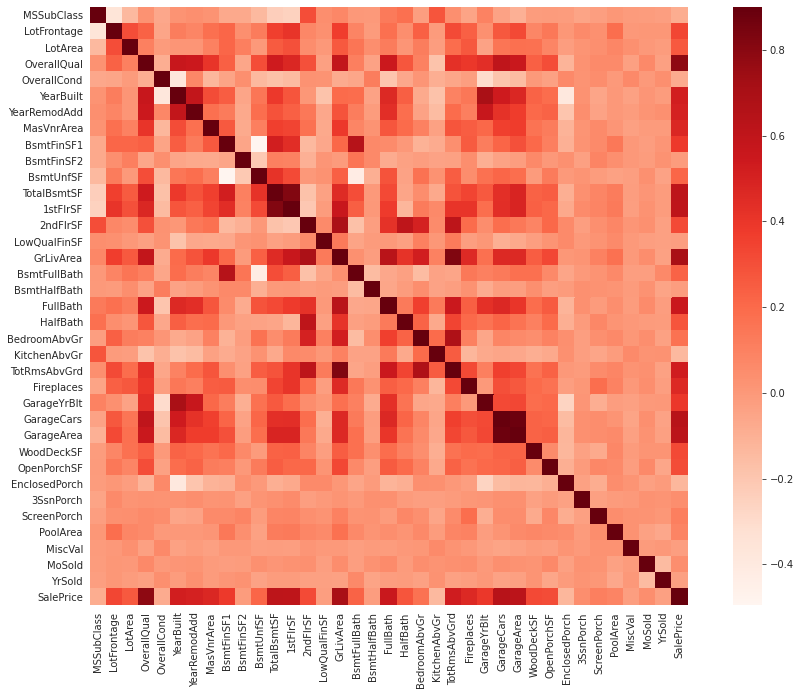

In [30]:
#correlation plot

# Compute correlations
corr = train.corr()

sns.set_style(style = 'white')
f, ax = plt.subplots(figsize=(16, 11))
sns.heatmap(corr, vmax=0.9, cmap="Reds", square=True)

[Text(0.5, 1.0, 'SalePrice distribution')]

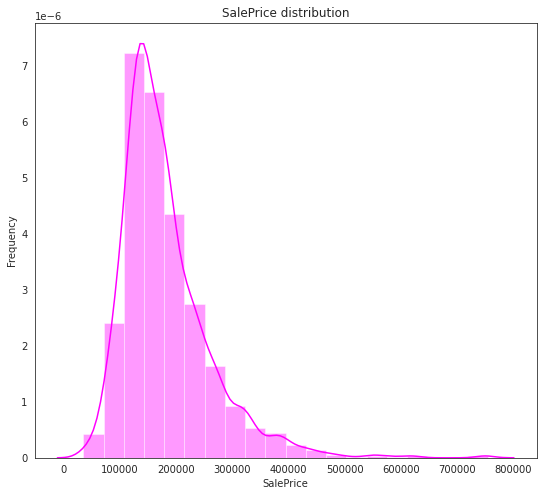

In [31]:
#check for skewness
f, ax = plt.subplots(figsize=(9, 8))
sns.distplot(train['SalePrice'], bins = 20, color = 'Magenta')
ax.set(ylabel="Frequency")
ax.set(xlabel="SalePrice")
ax.set(title="SalePrice distribution")


Right tailed

In [32]:
# log transformation
train["SalePrice"] = np.log1p(train["SalePrice"])

In [33]:
train["SalePrice"].describe()

count    1460.000000
mean       12.024057
std         0.399449
min        10.460271
25%        11.775105
50%        12.001512
75%        12.273736
max        13.534474
Name: SalePrice, dtype: float64

[Text(0.5, 1.0, 'SalePrice distribution')]

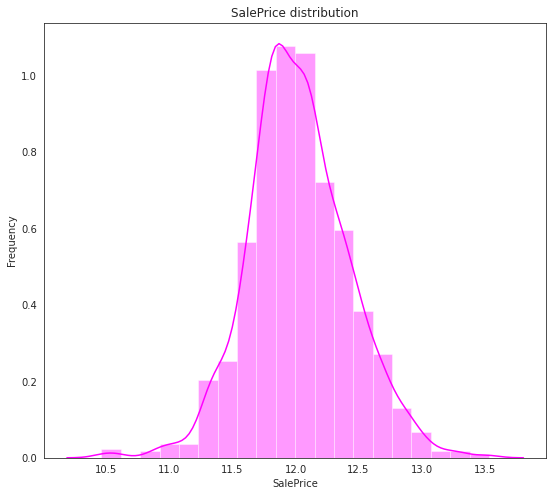

In [34]:
#check for skewness after transformation
f, ax = plt.subplots(figsize=(9, 8))
sns.distplot(train['SalePrice'], bins = 20, color = 'Magenta')
ax.set(ylabel="Frequency")
ax.set(xlabel="SalePrice")
ax.set(title="SalePrice distribution")


no skewness now

### Skewness in other variables

In [35]:
#Extracting the independent variables
train_features = train.drop('SalePrice', axis = 1)
train_dependent = train['SalePrice'].reset_index(drop=True)
test_features = test

In [36]:
test_features.shape

(1459, 79)

In [37]:
all_variables = pd.concat([train_features, test_features]).reset_index(drop=True)

In [38]:
# Fetch all numeric features
numeric_dtypes = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numeric = []
for i in all_variables.columns:
    if all_variables[i].dtype in numeric_dtypes:
        numeric.append(i)

In [39]:
# Find skewed numerical features
skew_features = all_variables[numeric].apply(lambda x: skew(x)).sort_values(ascending=False)

high_skew = skew_features[skew_features > 0.5]
skew_index = high_skew.index

print("There are {} numerical features with Skew > 0.5 :".format(high_skew.shape[0]))
skewness = pd.DataFrame({'Skew' :high_skew})
skew_features


There are 26 numerical features with Skew > 0.5 :


MiscVal          21.947195
PoolArea         16.898328
LotArea          12.822431
LowQualFinSF     12.088761
3SsnPorch        11.376065
KitchenAbvGr      4.302254
BsmtFinSF2        4.146143
EnclosedPorch     4.003891
ScreenPorch       3.946694
BsmtHalfBath      3.931594
MasVnrArea        2.611608
OpenPorchSF       2.535114
WoodDeckSF        1.842433
LotFrontage       1.643732
1stFlrSF          1.469604
BsmtFinSF1        1.425230
MSSubClass        1.375457
GrLivArea         1.269358
TotalBsmtSF       1.156894
BsmtUnfSF         0.919339
2ndFlrSF          0.861675
TotRmsAbvGrd      0.758367
Fireplaces        0.733495
HalfBath          0.694566
BsmtFullBath      0.624832
OverallCond       0.570312
BedroomAbvGr      0.326324
GarageArea        0.239257
OverallQual       0.197110
MoSold            0.195884
FullBath          0.167606
YrSold            0.132399
GarageCars       -0.219581
YearRemodAdd     -0.451020
GarageYrBlt      -0.468511
YearBuilt        -0.599806
dtype: float64

In [40]:
# Normalize skewed features
for i in skew_index:
    all_variables[i] = boxcox1p(all_variables[i], boxcox_normmax(all_variables[i] + 1))

## Feature Transformations 
(Borrowed from Lavanya Shukla)
Calculating log and square transformations.

In [41]:
def logs(res, ls):
    m = res.shape[1]
    for l in ls:
        res = res.assign(newcol=pd.Series(np.log(1.01+res[l])).values)   
        res.columns.values[m] = l + '_log'
        m += 1
    return res

log_features = ['LotFrontage','LotArea','MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF',
                 'TotalBsmtSF','1stFlrSF','2ndFlrSF','LowQualFinSF','GrLivArea',
                 'BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr','KitchenAbvGr',
                 'TotRmsAbvGrd','Fireplaces','GarageCars','GarageArea','WoodDeckSF','OpenPorchSF',
                 'EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea','MiscVal','YearRemodAdd']

all_variables = logs(all_variables, log_features)

In [42]:
def squares(res, ls):
    m = res.shape[1]
    for l in ls:
        res = res.assign(newcol=pd.Series(res[l]*res[l]).values)   
        res.columns.values[m] = l + '_sq'
        m += 1
    return res 

squared_features = ['YearRemodAdd', 'LotFrontage_log', 
              'TotalBsmtSF_log', '1stFlrSF_log', '2ndFlrSF_log', 'GrLivArea_log',
              'GarageCars_log', 'GarageArea_log']
all_variables = squares(all_variables, squared_features)


## Remapping Categorical variables

In [43]:
all_variables = pd.get_dummies(all_variables).reset_index(drop=True)
all_variables.shape
# one_hot_encoded_test_predictors = pd.get_dummies(test)
# final_train, final_test = one_hot_encoded_training_predictors.align(one_hot_encoded_test_predictors,join='left',axis=1)

(2919, 333)

In [44]:
all_variables.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,6.502440,13.750510,13.424520,7,3.989638,2003,2003,19.461743,117.855863,0.0,...,0,0,0,1,0,0,0,0,1,0
1,4.250991,15.408516,13.694527,6,5.996435,1976,1976,0.000000,146.805798,0.0,...,0,0,0,1,0,0,0,0,1,0
2,6.502440,14.096468,14.034133,7,3.989638,2001,2002,17.793825,91.575284,0.0,...,0,0,0,1,0,0,0,0,1,0
3,6.865584,13.155482,13.683421,7,3.989638,1915,1970,0.000000,52.776367,0.0,...,0,0,0,1,1,0,0,0,0,0
4,6.502440,15.823401,14.550142,8,3.989638,2000,2000,25.446564,112.040325,0.0,...,0,0,0,1,0,0,0,0,1,0


### Train and Test sets

In [45]:
X = all_variables.iloc[:len(train_dependent), :]
X_test = all_variables.iloc[len(train_dependent):, :]
X.shape, train_dependent.shape, X_test.shape

((1460, 333), (1460,), (1459, 333))

## Model Fitting

In [46]:
# Fitting Random Forest Regressor
regressor = RandomForestRegressor(n_estimators=300, random_state=0)
regressor.fit(X, train_dependent.ravel())

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=300, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [47]:
# Predicting results
Y_pred = regressor.predict(X_test)

In [48]:
Y_pred.shape

(1459,)

## Submission

In [49]:
submission = pd.read_csv("../input/house-prices-advanced-regression-techniques/sample_submission.csv")
submission.iloc[:,1] = np.floor(np.expm1(Y_pred))

In [50]:
# Fix outlier predictions
q1 = submission['SalePrice'].quantile(0.05)
q2 = submission['SalePrice'].quantile(0.95)
submission['SalePrice'] = submission['SalePrice'].apply(lambda x: x if x > q1 else x*0.77)
submission['SalePrice'] = submission['SalePrice'].apply(lambda x: x if x < q2 else x*1.1)
submission.to_csv("submission_1.csv", index=False)

In [51]:
# Scale predictions
submission['SalePrice'] *= 1.001619
submission.to_csv("submission_2.csv", index=False)